In [1]:
# see below link for more. my code is somewhat stolen/adapted from here.
# https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76
# https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch02/ch02.ipynb

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random 

def f(X):
    noise = np.random.uniform(-10, 10, X.shape)
    return 100 - 2*X + noise 

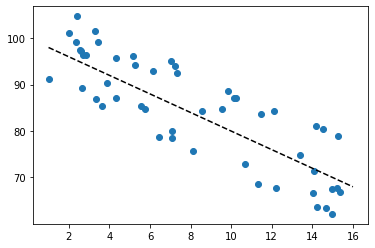

In [2]:
# make data and visualize it
reading_level = np.random.uniform(1,16,50)
clicks = f(reading_level) 

x = np.linspace(1,16,50)
plt.plot(x, 100 - 2*x, ls="--", color='k')

plt.scatter(reading_level, clicks)
plt.show()

In [3]:
def sse(mhat, bhat):
    pred = (mhat * reading_level) + bhat
    return sum(np.square(clicks - pred))

# linear regression the exact way...

mu_x = np.mean(reading_level)
mu_y = np.mean(clicks)

xdiff = reading_level - mu_x
ydiff = clicks - mu_y

m = sum(np.multiply(xdiff, ydiff)) / sum(np.square(xdiff))
print("m=%.04f"%m)

b = mu_y - m * mu_x
print("b=%.04f"%b)
print("SSE=%.04f"%sse(m, b))

m=-2.0928
b=101.4417
SSE=1967.1152


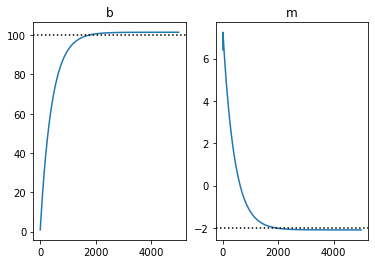

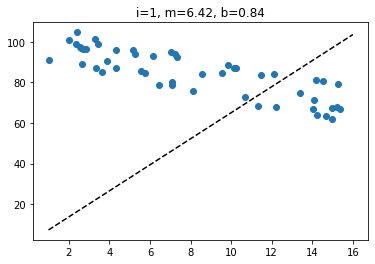

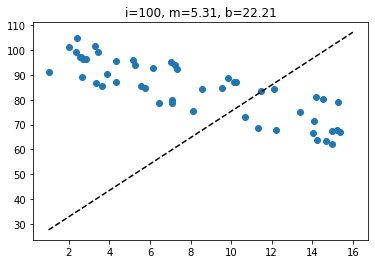

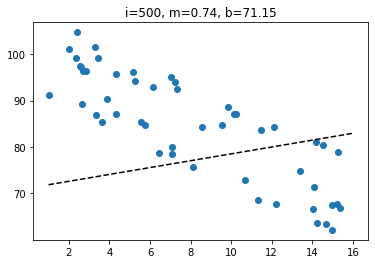

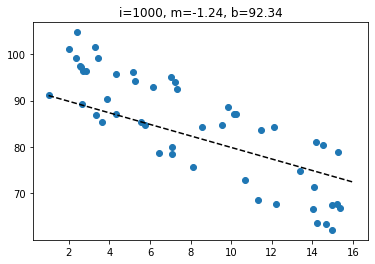

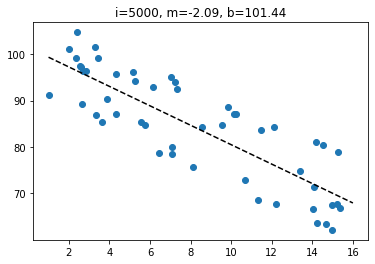

<Figure size 432x288 with 0 Axes>

In [4]:
# gradient descent way

def partial_b(mhat, bhat):
    pred = (mhat * reading_level) + bhat
    grad = np.mean(pred - clicks)
    return grad

def partial_m(mhat, bhat):
    pred = (mhat * reading_level) + bhat
    diff = pred - clicks
    grad = np.mean(np.multiply(diff, reading_level))
    return grad

num_iter = 5000
alpha = 0.01

m0 = 0
b0 = 0
iters = []
for i in range(num_iter):
    pb = partial_b(m0, b0)
    pm = partial_m(m0, b0)
    b0 = b0 - (alpha * pb)
    m0 = m0 - (alpha * pm)
    iters.append((b0, m0))
    
plt.subplot(1,2,1)
plt.plot(np.arange(num_iter), [b for b, m in iters])
plt.axhline(100, ls=":", color='k')
plt.title("b")
plt.subplot(1,2,2)
plt.plot(np.arange(num_iter), [m for b, m in iters])
plt.axhline(-2, ls=":", color='k')
plt.title("m")
plt.show()
plt.clf()

for i in [1, 100, 500, 1000, 5000]:
    x = np.linspace(1,16,50)
    bb, mm = iters[i-1]
    plt.plot(x, bb + mm*x, ls="--", color='k')
    plt.title("i=%s, m=%.02f, b=%.02f"%(i, mm, bb))
    plt.scatter(reading_level, clicks)
    plt.show()
    plt.clf()

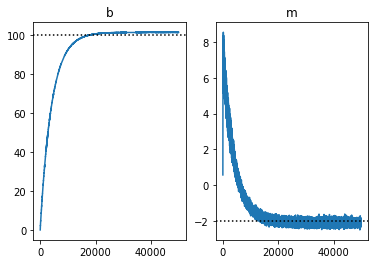

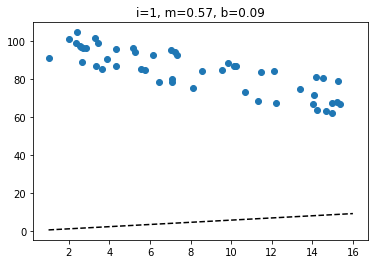

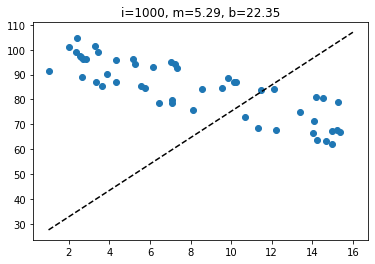

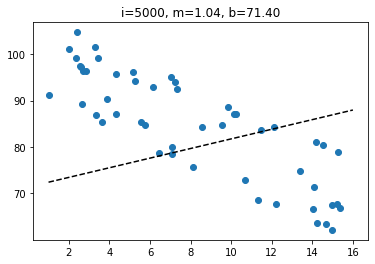

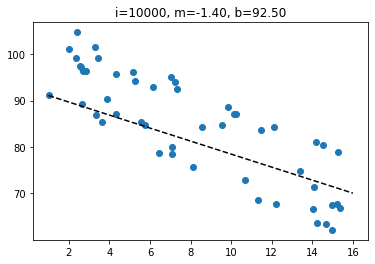

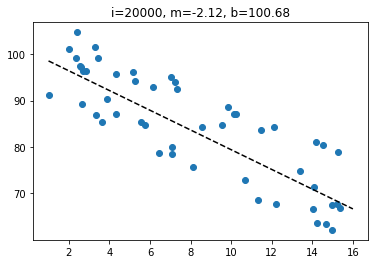

<Figure size 432x288 with 0 Axes>

In [5]:
# stochastic gradient descent way

def partial_b(mhat, bhat, x, y):
    pred = (mhat * x) + bhat
    return pred - y

def partial_m(mhat, bhat, x, y):
    pred = (mhat * x) + bhat
    diff = pred - y
    grad = diff * x
    return grad

data = [(xx, yy) for xx, yy in zip(reading_level, clicks)]

num_iter = 1000
alpha = 0.001

m0 = 0
b0 = 0
iters = []
for i in range(num_iter):
    random.shuffle(data)
    #if i % 100 == 0:
    #    print("m=%.02f b=%.02f diff = %s"%(m0, b0, sse(m0, b0)))
    for xx, yy in data:
        pb = partial_b(m0, b0, xx, yy)
        pm = partial_m(m0, b0, xx, yy)
        #print("%s\n%s\n------"%(pb, pm))
        b0 = b0 - (alpha * pb)
        m0 = m0 - (alpha * pm)
        iters.append((b0, m0))

plt.subplot(1,2,1)
plt.plot(np.arange(len(iters)), [b for b, m in iters])
plt.axhline(100, ls=":", color='k')
plt.title("b")
plt.subplot(1,2,2)
plt.plot(np.arange(len(iters)), [m for b, m in iters])
plt.axhline(-2, ls=":", color='k')
plt.title("m")
plt.show()
plt.clf()

for i in [1, 1000, 5000, 10000, 20000]:
    x = np.linspace(1,16,50)
    bb, mm = iters[i-1]
    plt.plot(x, bb + mm*x, ls="--", color='k')
    plt.title("i=%s, m=%.02f, b=%.02f"%(i, mm, bb))
    plt.scatter(reading_level, clicks)
    plt.show()
    plt.clf()